<font size="7">Final Project - Transfer Learning</font>

<font size="5">**In this notebook, I used exactly same hyper-parameters as before, the only different is that I use pre-trained model instead of my own model.**</font>

In [ ]:
!pip install -q torch-lr-finder

In [ ]:
import pandas as pd
import os
import fnmatch
import numpy as np
import shutil
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import random
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import torch.nn as nn
import torch.nn.functional as F
from torch_lr_finder import LRFinder
import torch.optim as optim
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
seed = 0

In [ ]:
parent_dir = '/content'
path = os.path.join(parent_dir, 'img')
os.mkdir(path) 

In [ ]:
parent_dir = '/content/img'
a = ['A', 'B', 'C', 'D', 'E']
for i in a:
  path = os.path.join(parent_dir, i)
  os.mkdir(path) 

In [ ]:
!gdown --id  10ge3QR_9qeKi-9-6TLKpWMWswRrGtGKj  --output "ASL.zip" 

Downloading...
From: https://drive.google.com/uc?id=10ge3QR_9qeKi-9-6TLKpWMWswRrGtGKj
To: /content/ASL.zip
100% 26.3M/26.3M [00:00<00:00, 50.3MB/s]


In [ ]:
!unzip ASL.zip

In [ ]:
file_name = os.listdir('/content/ASL')

In [ ]:
for f in file_name:

  a = list(f.split('.')[2])[0]
  global_des = '/content/img/' + a
  shutil.move('/content/ASL/' +f, global_des)


In [ ]:
data_dir = '/content'
classes = ('A', 'B', 'C', 'D', 'E')

# Data transformation
train_transforms = transforms.Compose([

    # transforms.RandomHorizontalFlip(),
    # transforms.RandomResizedCrop((50, 50), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    # transforms.Normalize()
])
val_transforms = transforms.Compose([


    transforms.ToTensor(),
    # transforms.Normalize()
])

# Read the train set from folder
train_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'img'), train_transforms)
val_ds = datasets.ImageFolder(
    os.path.join(data_dir, 'img'), train_transforms)

In [ ]:
torch.manual_seed(seed) 
train_set, _ = torch.utils.data.random_split(train_ds, [357, 63])
torch.manual_seed(seed)
_, val_set = torch.utils.data.random_split(val_ds, [357, 63])

In [ ]:
# Set batch size
batch_size = 15

# Split dataset to train and validation
torch.manual_seed(seed) 
train_set, _ = torch.utils.data.random_split(train_ds, [357, 63])
torch.manual_seed(seed) # Think why do we do this?
_, val_set = torch.utils.data.random_split(val_ds, [357, 63])

# load train and validation
# drop_last: the last epoch may contain less images, then we can choose to drop
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, 
        shuffle=True, drop_last=True, pin_memory=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, 
        shuffle=False, drop_last=False, num_workers=2)

In [ ]:
for images, labels in train_loader:
    pass

# Get one batch
images, labels = next(iter(train_loader))
images.shape  # Output: torch.Size([30, 3, 500, 500])    [how many images, kernel(rgb), wide, length]

torch.Size([15, 3, 500, 500])

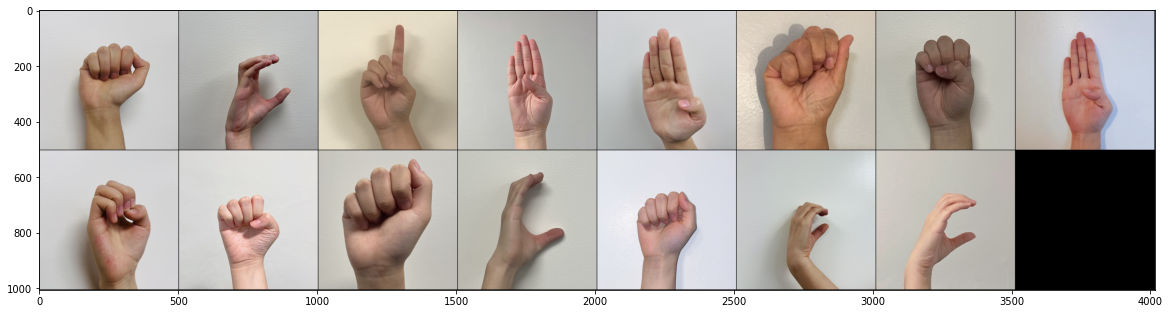

In [ ]:
def imshow(img):

  # img = img / 2 + 0.5
  npimg = img.numpy()
  plt.figure(figsize=(20,20))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
imshow(torchvision.utils.make_grid(images))


In [ ]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


In [ ]:
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

<font size="5">
Defind pre-trained model here.

I changed the out_features to 5, because I only have 5 classes.
</font>

In [ ]:
AlexNet_model.classifier[6] = nn.Linear(4096,5)

In [ ]:
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

AlexNet_model.to(device)

cpu


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
def train(device=torch.device("cpu"), scheduler=None):
  AlexNet_model.train()
  running_loss = 0.0
  correct = 0
  total = 0
  for i, data in enumerate(train_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = AlexNet_model(inputs.to(device))
    loss = criterion(outputs, labels.to(device))
    loss.backward()
    optimizer.step()
    if scheduler:
      scheduler.step()

    running_loss += loss.item()

    _, predicted = torch.max(outputs.data.detach().cpu(), 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  # Training loss
  # print(loss)
  # print(loss.item())
  # print(running_loss)
  train_loss.append(running_loss / len(train_loader))


  # Training acc
  train_acc.append(100.*correct/total)


In [ ]:
def validation(testdata_loader, device=torch.device("cpu")):
  correct = 0
  total = 0
  running_loss = 0.0
  AlexNet_model.eval()

  # prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
    for data in testdata_loader:
      images, labels = data
      # calculate outputs by running images through the network 
      outputs = AlexNet_model(images.to(device))

      # Calculate loss for validation
      loss = criterion(outputs, labels.to(device))
      running_loss += loss.item()

      # the class with the highest energy is what we choose as prediction
      _, predicted = torch.max(outputs.data.detach().cpu(), 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      
      # collect the correct predictions for each class
      for label, prediction in zip(labels, predicted):
        if label == prediction:
          correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1

  # Get validation loss and accuracy
  val_loss.append(running_loss/len(val_loader))
  val_acc.append(100.*correct/total)


  print("=="*20)
  print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))
  print("=="*20)
  # print accuracy for each class
  for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))

  return running_loss/len(val_loader)

In [ ]:
train_loss = []
train_acc = []
val_loss = []
val_acc = []
a = 0.5

In [ ]:
for i in range(10):
  print(i)
  train(device=device, scheduler=None)
  val_checker = validation(val_loader, device=device)
  if a > val_checker:
    PATH = './cnn2.pth'
    torch.save(AlexNet_model.state_dict(), PATH)
    print('Saved!')
    print(val_checker)
    a = val_checker

print('Done all')

0
Accuracy of the network on the test images: 93 %
Accuracy for class A     is: 63.6 %
Accuracy for class B     is: 100.0 %
Accuracy for class C     is: 100.0 %
Accuracy for class D     is: 100.0 %
Accuracy for class E     is: 100.0 %
Saved!
0.15789064168930053
1
Accuracy of the network on the test images: 98 %
Accuracy for class A     is: 90.9 %
Accuracy for class B     is: 100.0 %
Accuracy for class C     is: 100.0 %
Accuracy for class D     is: 100.0 %
Accuracy for class E     is: 100.0 %
Saved!
0.11828398406505584
2
Accuracy of the network on the test images: 100 %
Accuracy for class A     is: 100.0 %
Accuracy for class B     is: 100.0 %
Accuracy for class C     is: 100.0 %
Accuracy for class D     is: 100.0 %
Accuracy for class E     is: 100.0 %
Saved!
0.05125699788331985
3
Accuracy of the network on the test images: 100 %
Accuracy for class A     is: 100.0 %
Accuracy for class B     is: 100.0 %
Accuracy for class C     is: 100.0 %
Accuracy for class D     is: 100.0 %
Accuracy for

<font size="4">The accuracy and loss curve looks good, it takes very less epoch to touch 100% correct result.</font>

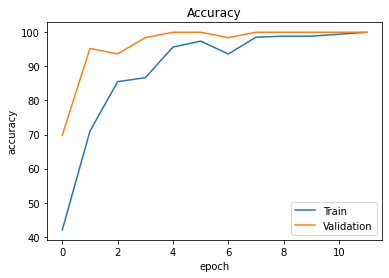

In [ ]:
# acc plot  
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Validation'])
plt.title('Accuracy')
plt.show()


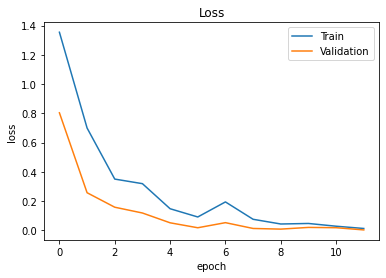

In [ ]:
# loss plot  
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','Validation'])
plt.title('Loss')
plt.show()

Rewrite Validation for confusion matrix

In [ ]:
def validation(testdata_loader, device=torch.device("cpu")):
  correct = 0
  total = 0
  running_loss = 0.0
  a =[]
  b = []
  AlexNet_model.eval()

  # prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
    for data in testdata_loader:
      images, labels = data
      # calculate outputs by running images through the network 
      outputs = AlexNet_model(images.to(device))

      # Calculate loss for validation
      loss = criterion(outputs, labels.to(device))
      running_loss += loss.item()

      # the class with the highest energy is what we choose as prediction
      _, predicted = torch.max(outputs.data.detach().cpu(), 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      
      # collect the correct predictions for each class
      for label, prediction in zip(labels, predicted):
        a.append(label.item())
        b.append(prediction.item())
        if label == prediction:
          correct_pred[classes[label]] += 1
        total_pred[classes[label]] += 1

  # Get validation loss and accuracy
  val_loss.append(running_loss/len(val_loader))
  val_acc.append(100.*correct/total)

  # if 100 * correct / total == 100:
  #   return 100

  print("=="*25)
  print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))
  print("=="*25)
  # print accuracy for each class
  for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
  print("=="*25)
  print('confusion Matrix:')
  print(confusion_matrix(a, b))
  print("=="*25)
  print('Loss:')
  return running_loss/len(val_loader)

In [ ]:
PATH = './cnn2.pth'
AlexNet_model.load_state_dict(torch.load(PATH))
_ = AlexNet_model.to(device)
validation(val_loader, device=device)

Accuracy of the network on the test images: 100 %
Accuracy for class A     is: 100.0 %
Accuracy for class B     is: 100.0 %
Accuracy for class C     is: 100.0 %
Accuracy for class D     is: 100.0 %
Accuracy for class E     is: 100.0 %
confusion Matrix:
[[11  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 14]]
Loss:


0.002604872640222311

<font size="5">In conclusion, eventhough I got the exactly same result as my model, but it took less epoch to get 100% accuracy and loss was lower than mine.</font>